<a href="https://colab.research.google.com/github/ribka-5/Logistic-Regression/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Hafizul Damar Laya_120450028
2. Adelia Mutiara Zulna_120450104
3. Hana Septiani_120450064
4. Ribka Gabriela Siburian_120450108
5. Ahmad Zidan Wirawan_120450044


**Import Libraries dan Dataset**

In [ ]:
# menekan warnings
import warnings
warnings.filterwarnings('ignore')

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 10. data bad good.xlsx to 10. data bad good.xlsx


**Bangun Dataframe**

In [ ]:
df = pd.read_excel("10. data bad good.xlsx", names=['observasi', 'tanggungan', 'pendapatan', 'usia', 'status', 'skor', 'status_pada_fisher'], sheet_name='Sheet2')
df.head()

,observasi,tanggungan,pendapatan,usia,status,skor,status_pada_fisher
0,1,6,10.0,39,Bad,-243095,bad
1,2,1,9.0,49,Bad,-422392,good
2,3,2,4.8,35,Bad,-201561,bad
3,4,0,4.9,52,Bad,-332358,bad
4,5,1,4.7,34,Bad,-23092,bad


Check data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   observasi           100 non-null    int64 
 1   tanggungan          100 non-null    int64 
 2   pendapatan          100 non-null    object
 3   usia                100 non-null    int64 
 4   status              100 non-null    object
 5   skor                100 non-null    int64 
 6   status_pada_fisher  100 non-null    object
dtypes: int64(4), object(3)
memory usage: 5.6+ KB


In [ ]:
df.isnull().sum()

observasi             0
tanggungan            0
pendapatan            0
usia                  0
status                0
skor                  0
status_pada_fisher    0
dtype: int64

In [ ]:
df = df.drop(columns=['observasi', 'skor', 'status_pada_fisher'])
df.head()

,tanggungan,pendapatan,usia,status
0,6,10,39,Bad
1,1,9,49,Bad
2,2,"4,8",35,Bad
3,0,"4,9",52,Bad
4,1,"4,7",34,Bad


In [ ]:
df.status.replace(to_replace=dict(Good=1, Bad=0), inplace=True)

In [ ]:
df

,tanggungan,pendapatan,usia,status
0,6,10,39,0
1,1,9,49,0
2,2,"4,8",35,0
3,0,"4,9",52,0
4,1,"4,7",34,0
...,...,...,...,...
95,1,"14,2",54,1
96,1,"10,7",59,1
97,3,10,58,1
98,0,12,39,1


Mengkonversi float menjadi string

In [ ]:
df["pendapatan"] = [float(str(i).replace(",", "")) for i in df["pendapatan"]]
df['pendapatan']

0      10.0
1       9.0
2      48.0
3      49.0
4      47.0
      ...  
95    142.0
96    107.0
97     10.0
98     12.0
99     23.0
Name: pendapatan, Length: 100, dtype: float64

In [ ]:
df['status'].value_counts()

1    53
0    47
Name: status, dtype: int64

In [ ]:
df

,tanggungan,pendapatan,usia,status
0,6,10.0,39,0
1,1,9.0,49,0
2,2,48.0,35,0
3,0,49.0,52,0
4,1,47.0,34,0
...,...,...,...,...
95,1,142.0,54,1
96,1,107.0,59,1
97,3,10.0,58,1
98,0,12.0,39,1


**Eksplor Data menggunakan plot**

In [ ]:
df_corr = df.corr()
df_corr

,tanggungan,pendapatan,usia,status
tanggungan,1.000000,0.038896,-0.008770,-0.173815
pendapatan,0.038896,1.000000,0.105373,0.414637
usia,-0.008770,0.105373,1.000000,0.140499
status,-0.173815,0.414637,0.140499,1.000000


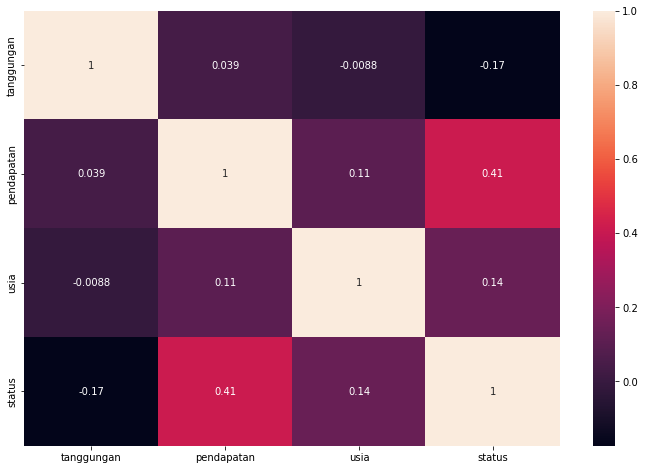

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
# annot=True untuk menampilkan korelasi antar atribut, jika nilai korelasi mendekati angka -1 dan 1 maka hubungan antar atribut makin tinggi
# Jika nilai positif berarti hubungan kedua variabel searah, jika negatif hubungan kedua variabel berbanding terbalik.

Text(0.5, 0, 'usia')

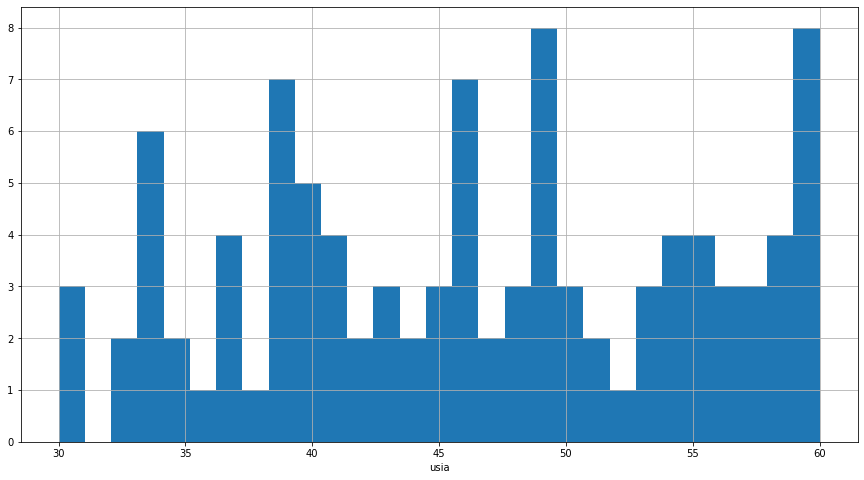

In [ ]:
# histogram usia
plt.figure(figsize=(15, 8))
df.usia.hist(bins=df.usia.nunique())
plt.xlabel('usia')

In [ ]:
# mean age
print('Rata-rata "usia" adalah %.2f' %(df["usia"].mean(skipna=True)))
# median age
print('Median dari "usia" is %.2f' %(df["usia"].median(skipna=True)))

Rata-rata "usia" adalah 46.23
Median dari "usia" is 46.00


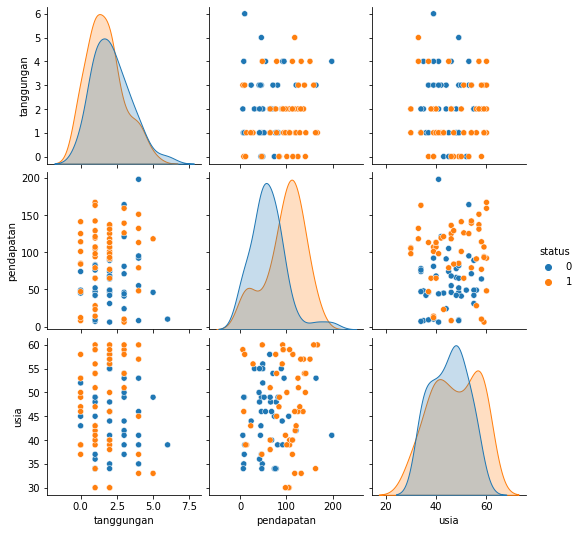

In [ ]:
sns.pairplot(df, hue='status')

**Membuat Logistic Regression**

Training dan Test Dataset

In [ ]:
X = df[['tanggungan', 'pendapatan', 'usia']]
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0) # 20% data testing 80% data training

Pembuatan model

In [ ]:
import sklearn.linear_model as lm

model = lm.LogisticRegression(solver='liblinear') # metode yang digunakan adalah liblinear
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
print(model.coef_)

[[-3.65083588e-01  2.14941048e-02  6.75459601e-05]]


In [ ]:
# test model
y_prediksi = model.predict(X_test)
y_prediksi
# data testing hasil prediksi

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
# model sudah berhasil membuat prediksi untuk data bad dan good
# contoh hasil prediksi
X_test.head()

,tanggungan,pendapatan,usia
26,3,164.0,53
86,0,114.0,58
2,2,48.0,35
55,0,84.0,47
75,0,101.0,39


In [ ]:
# menurut hasil prediksi dalam contoh data diatas no.26 merupakan data bad dan no.86 merupakan data good
y_test.head(5)

26    0
86    1
2     0
55    1
75    1
Name: status, dtype: int64

**Mengukur Kinerja Model**

Menggunakan confusion matrix

- **TP** (True Positive) = model sukses memprediksi positif ("ya"), karena kenyataannya memang positf("ya")
- **TN** (True Negative) = model sukses memprediksi negatif ("tidak"), karena kenyataannya memang negatif("tidak")
- **FP** (False Positive) = model memprediksi positif ("ya"), namun salah karena kenyataannya negatif("tidak")
- **FN** (False Negatif) = model memprediksi negatif("ya"), namun salah karena kenyataannya positif ("ya")

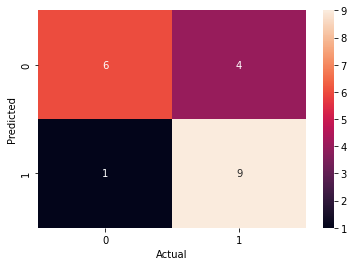

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_prediksi, rownames=['Predicted'], colnames=['Actual'])
sns.heatmap(confusion_matrix, annot=True)

Berdasarkan confusion matriks diatas dihasilkan:
- TP = 9
- FP = 1
- FN = 4
- TN = 6

Check accuracy, precision, sensivity(recall)

In [ ]:
print(classification_report(y_test, y_prediksi))
print("accuracy: ", accuracy_score(y_test, y_prediksi))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.69      0.90      0.78        10

    accuracy                           0.75        20
   macro avg       0.77      0.75      0.74        20
weighted avg       0.77      0.75      0.74        20

accuracy:  0.75


Berdasarkan check diatas model tersebut memiliki akurasi sebesar 75%, yang berarti sudah sangat baik. Secara umum di bidang Sains Data, model dengan akurasi di atas 70% sudah bisa digolongkan sebagai model yang berkinerja cukup baik. Angka di atas mengukur keseluruhan akurasi model, tanpa membedakan error FP maupun FN. Ini kurang informatif terutama pada penerapan model yang lebih difokuskan pada mendeteksi hal-hal yang sangat peka pada *false positive* atau *false negative* saja. Untuk itu ada saatnya kita perlu mengukur jumlah data yang sukses diprediksi seagai positf, dibandingkan dengan seluruh data yang diprediksi positif, baik yang kenyataannya benar maupun tidak benar. Ini disebut presisi (ketepatan) yang sebesar 69%. Presisi memberi petunjuk seberapa baik model dapat "menangkap" prediksi positif. Semakin banyak FP, atau model sering salah memprediksi kemunculan data sebagai positif, maka angka presisi akan semakin rendah. Sementara itu sensivity/recall mengukur banyaknya data yang sukses diprediksi sebagai positif dibandingkan dengan seluruh data yang pada keyataannya positif. Sensitivity memberi kita petunjuk seberapa banyak model telah "luput" dalam menangkap kasus-kasus yang seharusnya diprediksi positif. Model kita memiliki sensivity sebesar 90%.

In [ ]:
import sklearn.metrics as met
# Area Under Curve (AUC)
# luas bidang dibawah kurva, dipakai sebagai ukuran baik-buruknya suatu model
# nilai auc mendekati 0,5 adalah model yang buruk dan mendekati 1 model yang sempurna, tetapi model model <1 dikatakan overfit

auc = met.roc_auc_score(y_test, y_prediksi)
print(auc)

0.75


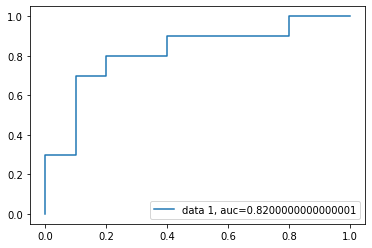

In [ ]:
# Receiver Operating Classification (ROC)
# menggambarkan nilai TP di sumbu Y terhadap nilai FP di sumbu X

y_pred_proba = model.predict_proba(X_test)[::,1]
fp, tp, _ = met.roc_curve(y_test, y_pred_proba)
auc = met.roc_auc_score(y_test, y_pred_proba)
plt.plot(fp,tp,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Dari ROC curve diatas, kita bisa menyimpulkan bahwa model yang kita buat memberikan performa yang cukup baik dengan nilai AUC (Area Under the Curve) 0.82 (mendekati 1). Model dikatakan sempurna ketepatan prediksinya jika nilai AUC adalah 1 yang artinya 100% area dibawah kurva. Kemampuan model yang kita buat dinyatakan dengan nilai 0.82 yang artinya model yang kita buat memiliki 82% area dibawah kurva.